# [**Comparaison des méthodes d'apprentissage de variétés**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_2_manifold/plot_compare_methods.ipynb)<br/>([*Comparison of Manifold Learning methods*](https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html))

Une illustration de la réduction de la dimensionnalité sur le jeu de données S-curve avec différentes méthodes d'apprentissage de variétés.

Pour une discussion et une comparaison de ces algorithmes, voir la [**page du module manifold** (2.2)](https://scikit-learn.org/stable/modules/manifold.html).

Pour un exemple similaire, où les méthodes sont appliquées à un jeu de données de sphères, voir les [**méthodes d'apprentissage de variétés sur une sphère sectionnée**](https://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html).

Notez que le but du MDS est de trouver une représentation en basse dimension des données (ici 2D) dans laquelle les distances respectent bien les distances dans l'espace de haute dimension d'origine. Contrairement à d'autres algorithmes d'apprentissage de variétés, il ne cherche pas une représentation isotrope des données dans l'espace de basse dimension.

In [1]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

# Préparation des données

Nous commençons par générer le jeu de données S-curve.

In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import manifold, datasets

n_samples = 1_500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

Jetons un coup d'œil aux données d'origine. Définissons également des fonctions utilitaires que nous utiliserons plus loin.

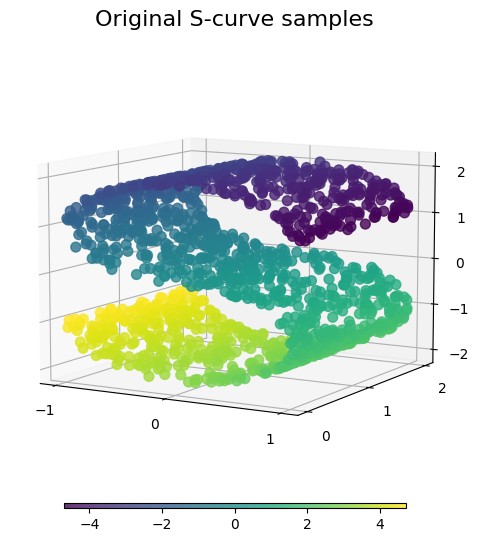

In [3]:
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "Original S-curve samples")

# Définir des algorithmes pour l'apprentissage de variétés

L'apprentissage de variétés est une approche de réduction de la dimensionnalité non linéaire. Les algorithmes pour cette tâche sont basés sur l'idée que la dimensionnalité de nombreux ensembles de données est artificiellement élevée.

En savoir plus dans le [**guide de l'utilisateur** (2.2)](https://scikit-learn.org/stable/modules/manifold.html).

In [4]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

## Plongement local linéaire (LLE)

L'incorporation locale linéaire (LLE) peut être considérée comme une série d'analyses en composantes principales locales qui sont comparées globalement pour trouver la meilleure incorporation non linéaire. En savoir plus dans le [**guide de l'utilisateur** (2.2.3)](https://scikit-learn.org/stable/modules/manifold.html#locally-linear-embedding).

In [5]:
params = {
    "n_neighbors": n_neighbors,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)

lle_ltsa = manifold.LocallyLinearEmbedding(method="ltsa", **params)
S_ltsa = lle_ltsa.fit_transform(S_points)

lle_hessian = manifold.LocallyLinearEmbedding(method="hessian", **params)
S_hessian = lle_hessian.fit_transform(S_points)

lle_mod = manifold.LocallyLinearEmbedding(method="modified", **params)
S_mod = lle_mod.fit_transform(S_points)

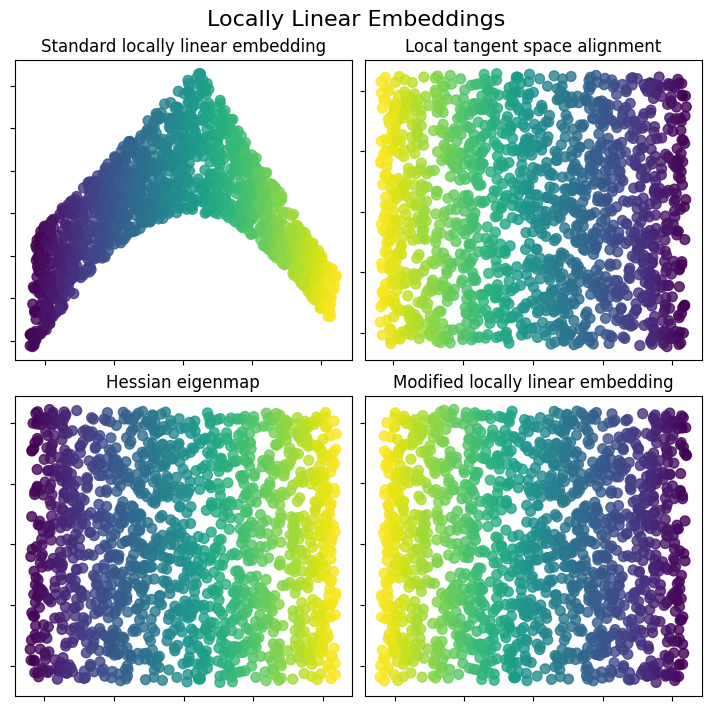

In [6]:
fig, axs = plt.subplots(
    nrows=2, ncols=2, figsize=(7, 7), facecolor="white", constrained_layout=True
)
fig.suptitle("Locally Linear Embeddings", size=16)

lle_methods = [
    ("Standard locally linear embedding", S_standard),
    ("Local tangent space alignment", S_ltsa),
    ("Hessian eigenmap", S_hessian),
    ("Modified locally linear embedding", S_mod),
]
for ax, method in zip(axs.flat, lle_methods):
    name, points = method
    add_2d_scatter(ax, points, S_color, name)

plt.show()

## Plongement Isomap

Réduction de la dimensionnalité non linéaire par cartographie isométrique. Isomap cherche une incorporation en dimensions réduites qui maintient les distances géodésiques entre tous les points. En savoir plus dans le [**guide de l'utilisateur** (2.2.2)](https://scikit-learn.org/stable/modules/manifold.html#isomap).

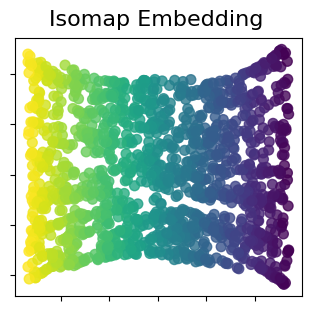

In [7]:
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(S_points)

plot_2d(S_isomap, S_color, "Isomap Embedding")

## Scaling multidimensionnel

Le scaling multidimensionnel (MDS) cherche une représentation en dimensions réduites des données dans laquelle les distances respectent bien les distances dans l'espace de haute dimension d'origine. En savoir plus dans le [**guide de l'utilisateur** (2.2.8)](https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling).

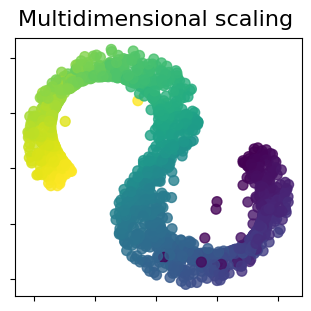

In [8]:
md_scaling = manifold.MDS(
    n_components=n_components,
    max_iter=50,
    n_init=4,
    random_state=0,
    normalized_stress=False,
)
S_scaling = md_scaling.fit_transform(S_points)

plot_2d(S_scaling, S_color, "Multidimensional scaling")

## Incorporation spectrale pour la réduction de la dimensionnalité non linéaire

Cette implémentation utilise Laplacian Eigenmaps, qui trouve une représentation en dimensions réduites des données en utilisant une décomposition spectrale du Laplacien du graphe. En savoir plus dans le [**guide de l'utilisateur** (2.2.6)](https://scikit-learn.org/stable/modules/manifold.html#spectral-embedding).

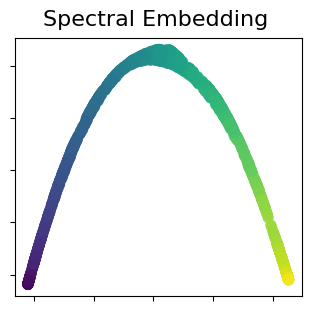

In [9]:
spectral = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors
)
S_spectral = spectral.fit_transform(S_points)

plot_2d(S_spectral, S_color, "Spectral Embedding")

## T-distributed Stochastic Neighbor Embedding

Il convertit les similarités entre les points de données en probabilités conjointes et essaie de minimiser la divergence de Kullback-Leibler entre les probabilités conjointes de l'incorporation en basse dimension et les données de haute dimension. t-SNE a une fonction de coût qui n'est pas convexe, c'est-à-dire qu'avec des initialisations différentes, nous pouvons obtenir des résultats différents. En savoir plus dans le [**guide de l'utilisateur** (2.2.9)](https://scikit-learn.org/stable/modules/manifold.html#t-sne).

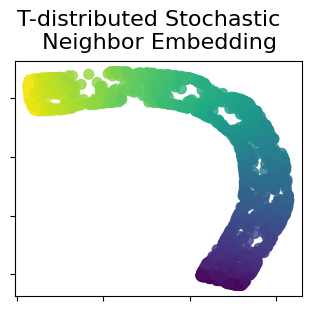

In [10]:
t_sne = manifold.TSNE(
    n_components=n_components,
    perplexity=30,
    init="random",
    n_iter=250,
    random_state=0,
)
S_t_sne = t_sne.fit_transform(S_points)

plot_2d(S_t_sne, S_color, "T-distributed Stochastic  \n Neighbor Embedding")